In [1]:
from random import uniform
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
NUMBER_OF_EXPERIMENTS = 1000
NUMBER_OF_TEST_POINTS = 400

In [3]:
class Point:
    """To create a Point object we pass a list of line coeficcients (line in general form)
       corresponding to f function. Point object has three atributes:
        coordinates - list of integers, 0 entry is an artificial coordiante, 1st and 2nd entry
                      correspond to x and y coordinates on Cartesian grid
        mapping     - an integer, takes values 1 and -1 only, indicates on which side of line,
                      defined by f function, the point is
        pla         - an integer, takes values 1 and -1 only, indicates on which side of line,
                      defined by g function, the point is (used for PLA step)"""
    def __init__(self, f_general):
        # x0 = coordinate[0], x1 = coordinate[1], x2 = coordinate[2]
        self.coordinates = [1, uniform(-1, 1), uniform(-1, 1)]
        self.mapping = np.sign(np.dot(self.coordinates, f_general))
        self.pla = 0

    def classify(self, weights):
        """Classifies a point based on the current g function.
            Args:
            weights - a list of integers, weights for g function (coeficients of line
                      in general form corresponding to g function)"""
        self.pla = np.sign(np.dot(self.coordinates, weights))

    def correctly_classified(self):
        """Checks if the point is classified correctly, i.e. if function f and g maps a point
           to the same value.
           Returns a boolean, indicates if point is correctly classified."""
        return self.mapping == self.pla

In [4]:
def get_f():
    """The method generates a line going through two randomly chosen points (function f).
       Returns a list of integers, corresponding to line coefficients in general form.
       I.e. line: Ax + By + C = 0
            get_f return format [C, A, B]"""
    rand_x = [uniform(-1, 1), uniform(-1, 1)]
    rand_y = [uniform(-1, 1), uniform(-1, 1)]

    coefficients = np.polyfit(rand_x, rand_y, 1)
    f_general = [coefficients[1], coefficients[0], 1]
    return f_general

In [5]:
def all_correctly_classified(points):
    """Checks if all points passed as argument are correctly classified.
        Args:
        points - a list of point objects
        Returns a boolean, true if all points are correctly classifed, false otherwise."""
    for point in points:
        if not point.correctly_classified():
            return False
    return True

In [6]:
def single_experiment(number_of_points, number_of_test_points=0):
    """The method correcponds to single experiment, i.e. Generate the given number of points
       and find a g function that classifies them correctly. Then check how good the classification
       is by using genereted test points.
        Args:
        number_of_points - an integer, N, indicates number of training points
        number_of_test_points - an integer, indicates number of test points that will be used
                                to verify how good is the classification (g function)
        Returns:
        an integer, number of iterations it took PLA to find g, i.e. find a valid g function
        a float, probability of f(x) /= g(x) (misclassification)."""
    f_function = get_f()
    points = [Point(f_function) for _ in range(number_of_points)]

    weights = [0, 0, 0]
    number_of_iterations = 0
    while not all_correctly_classified(points):
        number_of_iterations += 1
        incorrect = [p for p in points if not p.correctly_classified()]
        point = np.random.choice(incorrect)
        # Update weights
        for i in range(3):
            weights[i] = weights[i] + point.mapping * point.coordinates[i]

        # Classify points
        for p in points:
            p.classify(weights)
            
    if number_of_test_points:
        test_points = [Point(f_function) for _ in range(number_of_test_points)]
        # Classify test points
        for tp in test_points:
            tp.classify(weights)
        
        misclassified = len([tp for tp in test_points if not tp.correctly_classified()])
        probability = misclassified/float(number_of_test_points) if number_of_test_points else 0

    return number_of_iterations, probability

In [7]:
def perform_experiments(number_of_points):
    """The main method used for my approximations for the problem set questions.
       This method runs a 1000 experiments to find the average number of iterations
       it takes PLA to find g and average probability of misclassification.
       Both values get printed.
       Args:
       number_of_points, an integer, N, number of training points for the problem"""
    print "N =", number_of_points, "\n"
    total_number_of_iterations = 0
    prob_sum = 0
    for i in range(NUMBER_OF_EXPERIMENTS):
        (iter_no, prob) = single_experiment(number_of_points, NUMBER_OF_TEST_POINTS)
        total_number_of_iterations += iter_no
        prob_sum += prob
    average_iter = total_number_of_iterations/float(NUMBER_OF_EXPERIMENTS)
    average_prob = prob_sum/float(NUMBER_OF_EXPERIMENTS)
    print "Average number of iterations it takes for PLA to converge:"
    print average_iter
    print "Average probability of missclassification of a point:"
    print average_prob

In [8]:
perform_experiments(number_of_points=10)

N = 10 

Average number of iterations it takes for PLA to converge:
8.939
Average probability of missclassification of a point:
0.11004


In [9]:
perform_experiments(number_of_points=100)

N = 100 

Average number of iterations it takes for PLA to converge:
112.504
Average probability of missclassification of a point:
0.0132675


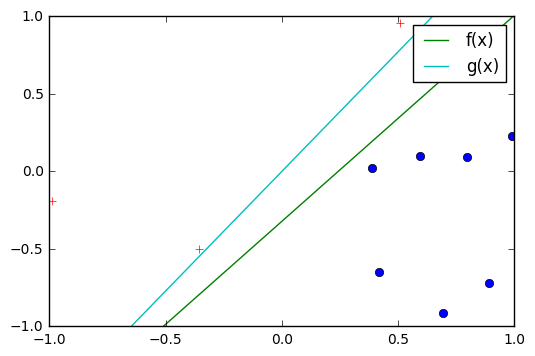

In [10]:
f_function = get_f()
points = [Point(f_function) for _ in range(10)]

weights = [0, 0, 0]
number_of_iterations = 0
while not all_correctly_classified(points):
    number_of_iterations += 1
    incorrect = [p for p in points if not p.correctly_classified()]
    point = np.random.choice(incorrect)
    # Update weights
    for i in range(3):
        weights[i] = weights[i] + point.mapping * point.coordinates[i]

    # Classify points
    for p in points:
        p.classify(weights)
        
def f(x):
    return -(f_function[1]*x + f_function[0])/float(f_function[2])

def g(x):
    return -(weights[1]*x + weights[0])/float(weights[2])

t1 = np.arange(-1, 1.5, 0.1)
points_x_plus = [p.coordinates[1] for p in points if p.mapping == 1]
points_y_plus = [p.coordinates[2] for p in points if p.mapping == 1]

points_x_minus = [p.coordinates[1] for p in points if p.mapping == -1]
points_y_minus = [p.coordinates[2] for p in points if p.mapping == -1]
        
plt.plot(points_x_plus, points_y_plus, 'r+')
plt.plot(points_x_minus, points_y_minus, 'bo')
plt.plot(t1, f(t1), 'g')
plt.plot(t1, g(t1), 'c')
green_line = mlines.Line2D([], [], color='g',label='f(x)')
cyan_line = mlines.Line2D([], [], color='c',label='g(x)')
plt.legend(handles=[green_line, cyan_line])
plt.axis([-1, 1, -1, 1])
plt.show()

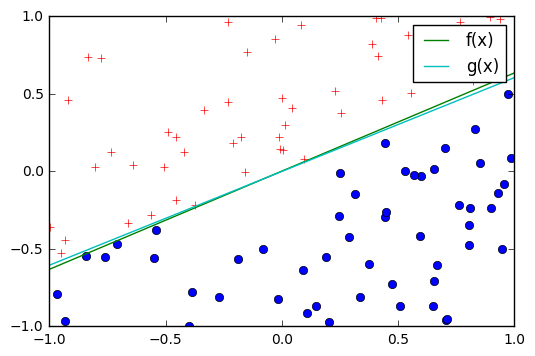

In [11]:
f_function = get_f()
points = [Point(f_function) for _ in range(100)]

weights = [0, 0, 0]
number_of_iterations = 0
while not all_correctly_classified(points):
    number_of_iterations += 1
    incorrect = [p for p in points if not p.correctly_classified()]
    point = np.random.choice(incorrect)
    # Update weights
    for i in range(3):
        weights[i] = weights[i] + point.mapping * point.coordinates[i]

    # Classify points
    for p in points:
        p.classify(weights)
        
def f(x):
    return -(f_function[1]*x + f_function[0])/float(f_function[2])

def g(x):
    return -(weights[1]*x + weights[0])/float(weights[2])

t1 = np.arange(-1, 1.5, 0.1)
points_x_plus = [p.coordinates[1] for p in points if p.mapping == 1]
points_y_plus = [p.coordinates[2] for p in points if p.mapping == 1]

points_x_minus = [p.coordinates[1] for p in points if p.mapping == -1]
points_y_minus = [p.coordinates[2] for p in points if p.mapping == -1]
        
plt.plot(points_x_plus, points_y_plus, 'r+')
plt.plot(points_x_minus, points_y_minus, 'bo')
plt.plot(t1, f(t1), 'g')
plt.plot(t1, g(t1), 'c')
green_line = mlines.Line2D([], [], color='g',label='f(x)')
cyan_line = mlines.Line2D([], [], color='c',label='g(x)')
plt.legend(handles=[green_line, cyan_line])
plt.axis([-1, 1, -1, 1])
plt.show()